ANALYSING NETFLIX MOVIES DATA

AIM: Basic Analysis to explore the data and clean up the data

In [46]:
# Importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Read the CSV file using pandas
net = pd.read_csv('netflix_dataset.csv')

In [48]:
# Displaying the top 5 rows and columns
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [49]:
# Check for missing values in each column
net.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [50]:
# Checking out the summary statistics
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [51]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [52]:
net.shape

(8807, 12)

Some analysis have been done to get to know the data
Findings: - It contains missing values
          - Durations column is meant to be an integer column, it should be changed
          - Missing values should be filled or dropped based on further analysis. It will be dropped
          - Filtering should be done to select the 'Movies' from the type column for further analysis then the shape, info, presence/absence of null values will be checked again

In [53]:
#Subset to get only Movies from the type column
net_movies_only = net[net.type == 'Movie']

#Subset to get other columns of interest
net_movies_col = net_movies_only[['title', 'country', 'release_year', 'duration', 'rating', 'listed_in', 'director']]

print(net_movies_col.head(3))

                              title  \
0              Dick Johnson Is Dead   
6  My Little Pony: A New Generation   
7                           Sankofa   

                                             country  release_year duration  \
0                                      United States          2020   90 min   
6                                                NaN          2021   91 min   
7  United States, Ghana, Burkina Faso, United Kin...          1993  125 min   

  rating                                         listed_in  \
0  PG-13                                     Documentaries   
6     PG                          Children & Family Movies   
7  TV-MA  Dramas, Independent Movies, International Movies   

                        director  
0                Kirsten Johnson  
6  Robert Cullen, José Luis Ucha  
7                   Haile Gerima  


In [54]:
# Dropping null values
net_movies_col = net_movies_col.dropna()

In [55]:
net_movies_col.isnull().sum()

title           0
country         0
release_year    0
duration        0
rating          0
listed_in       0
director        0
dtype: int64

In [56]:
#changing the duration column to an integer
net_movies_col.duration = net_movies_col.duration.str.strip('min')
net_movies_col.duration = net_movies_col.duration.astype('int')
print(net_movies_col.duration)

0        90
7       125
9       104
12      127
24      166
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5558, dtype: int32


In [57]:
net_movies_col.describe()

,release_year,duration
count,5558.000000,5558.000000
mean,2012.775999,101.183699
std,9.836948,26.467317
min,1942.000000,3.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,115.000000
max,2021.000000,253.000000


In [58]:
net_movies_col.shape

(5558, 7)

In [59]:
net_movies_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5558 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5558 non-null   object
 1   country       5558 non-null   object
 2   release_year  5558 non-null   int64 
 3   duration      5558 non-null   int32 
 4   rating        5558 non-null   object
 5   listed_in     5558 non-null   object
 6   director      5558 non-null   object
dtypes: int32(1), int64(1), object(5)
memory usage: 325.7+ KB


Duration column has been changed to integers, missing values have been sorted
Our data is ready to be visualized!!

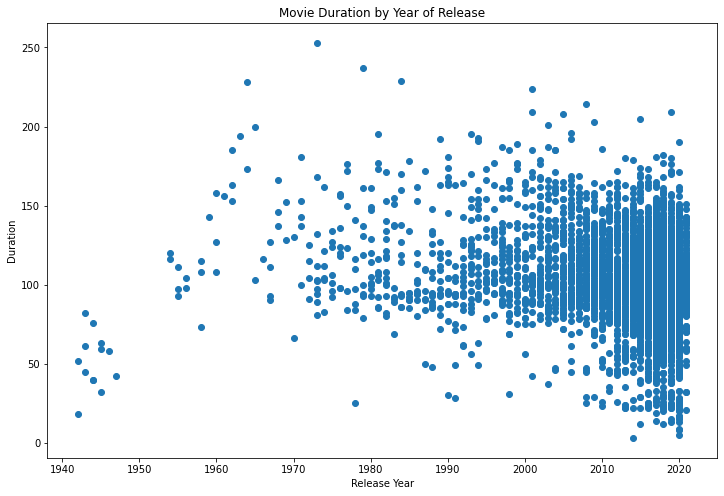

In [60]:
#visualize using scatterplot
#set the fig size
fig = plt.figure(figsize=(12,8))

plt.scatter(net_movies_col.release_year, net_movies_col.duration)
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Movie Duration by Year of Release')
plt.show()

Have an idea of movies shorter than 60 minutes

In [61]:
#Filter for movies shorter than 60 minutes
short_movies = net_movies_col[net_movies_col.duration < 60]
print(short_movies.head())

                                    title               country  release_year  \
279  Monster Hunter: Legends of the Guild  United States, Japan          2021   
694                                 Aziza        Lebanon, Syria          2019   
766               Alan Saldaña: Locked Up                Mexico          2021   
769              From Stress to Happiness             Argentina          2020   
991                           One Like It                 Egypt          2020   

     duration rating                                          listed_in  \
279        59  TV-PG  Action & Adventure, Anime Features, Children &...   
694        13  TV-PG               Comedies, Dramas, Independent Movies   
766        49  TV-MA                                    Stand-Up Comedy   
769        58   TV-G                Documentaries, International Movies   
991        15   TV-G   Dramas, Independent Movies, International Movies   

                              director  
279                  

In [62]:
#visualize using correlation matrix
#To get a pictorial representation to understand the correlation between columns
corr = net_movies_col.corr()

corr.style.background_gradient(cmap='coolwarm')

,release_year,duration
release_year,1.000000,-0.195904
duration,-0.195904,1.000000


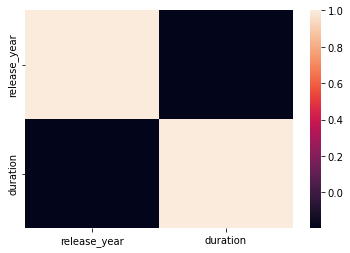

In [63]:
#visualize with seaborn heatmap
import seaborn as sns
sns.heatmap(net_movies_col.corr());

Countries with longest movie duration

In [64]:
#Filter for movies longer than 60 minutes
long_movies = net_movies_col[net_movies_col.duration > 60]
print(long_movies.head())

                   title                                            country  \
0   Dick Johnson Is Dead                                      United States   
7                Sankofa  United States, Ghana, Burkina Faso, United Kin...   
9           The Starling                                      United States   
12          Je Suis Karl                            Germany, Czech Republic   
24                 Jeans                                              India   

    release_year  duration rating  \
0           2020        90  PG-13   
7           1993       125  TV-MA   
9           2021       104  PG-13   
12          2021       127  TV-MA   
24          1998       166  TV-14   

                                           listed_in             director  
0                                      Documentaries      Kirsten Johnson  
7   Dramas, Independent Movies, International Movies         Haile Gerima  
9                                   Comedies, Dramas       Theodore Melfi 

In [65]:
# Countries that have long movie durations
Countries_long_movies = long_movies[['country', 'duration']]
print(Countries_long_movies.head())

                                              country  duration
0                                       United States        90
7   United States, Ghana, Burkina Faso, United Kin...       125
9                                       United States       104
12                            Germany, Czech Republic       127
24                                              India       166


Sorting the data to know the shortest and longest movies

In [66]:
shortest_movie = short_movies[['title', 'duration']]
print(shortest_movie.min())

title       #Rucker50
duration            3
dtype: object


In [67]:
longest_movie = long_movies[['title', 'duration']]
print(longest_movie.max())

title       반드시 잡는다
duration        253
dtype: object


Years Most Movies were Produced

In [68]:
years_most_movies = net_movies_col['release_year'].value_counts()
print(years_most_movies.head())

2017    713
2018    687
2016    628
2019    542
2020    444
Name: release_year, dtype: int64


In [69]:
print(max(years_most_movies))

713


Countries that Produced Most Movies Per Year 

In [70]:
net_movies_col[['country', 'release_year']].value_counts().head(20)

country        release_year
United States  2017            276
               2018            234
               2019            208
               2016            207
               2020            169
               2015            110
India          2017             96
               2018             79
United States  2014             73
India          2019             72
               2016             71
United States  2013             69
India          2020             59
United States  2012             57
India          2015             52
               2013             51
United States  2010             47
               2021             45
India          2014             45
United States  2011             44
dtype: int64

Movies with PG-13 Ratings

In [71]:
net_movies_col

,title,country,release_year,duration,rating,listed_in,director
0,Dick Johnson Is Dead,United States,2020,90,PG-13,Documentaries,Kirsten Johnson
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125,TV-MA,"Dramas, Independent Movies, International Movies",Haile Gerima
9,The Starling,United States,2021,104,PG-13,"Comedies, Dramas",Theodore Melfi
12,Je Suis Karl,"Germany, Czech Republic",2021,127,TV-MA,"Dramas, International Movies",Christian Schwochow
24,Jeans,India,1998,166,TV-14,"Comedies, International Movies, Romantic Movies",S. Shankar
...,...,...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96,TV-MA,"Dramas, International Movies, Thrillers",Majid Al Ansari
8802,Zodiac,United States,2007,158,R,"Cult Movies, Dramas, Thrillers",David Fincher
8804,Zombieland,United States,2009,88,R,"Comedies, Horror Movies",Ruben Fleischer
8805,Zoom,United States,2006,88,PG,"Children & Family Movies, Comedies",Peter Hewitt


In [72]:
col = net_movies_col[net_movies_col['rating'] == 'PG-13'] 
col

,title,country,release_year,duration,rating,listed_in,director
0,Dick Johnson Is Dead,United States,2020,90,PG-13,Documentaries,Kirsten Johnson
9,The Starling,United States,2021,104,PG-13,"Comedies, Dramas",Theodore Melfi
27,Grown Ups,United States,2010,103,PG-13,Comedies,Dennis Dugan
28,Dark Skies,United States,2013,97,PG-13,"Horror Movies, Sci-Fi & Fantasy",Scott Stewart
29,Paranoia,"United States, India, France",2013,106,PG-13,Thrillers,Robert Luketic
...,...,...,...,...,...,...,...
8757,World Trade Center,United States,2006,129,PG-13,"Action & Adventure, Dramas",Oliver Stone
8764,Wyatt Earp,United States,1994,191,PG-13,Action & Adventure,Lawrence Kasdan
8766,XXx,United States,2002,124,PG-13,"Action & Adventure, Sports Movies",Rob Cohen
8767,XXX: State of the Union,United States,2005,101,PG-13,Action & Adventure,Lee Tamahori


In [73]:
#movies with PG-13
col2 = col[['title', 'rating']]
col2

,title,rating
0,Dick Johnson Is Dead,PG-13
9,The Starling,PG-13
27,Grown Ups,PG-13
28,Dark Skies,PG-13
29,Paranoia,PG-13
...,...,...
8757,World Trade Center,PG-13
8764,Wyatt Earp,PG-13
8766,XXx,PG-13
8767,XXX: State of the Union,PG-13


Analysis of COVID Period (2020) and Post COVID period (2021)

How many Movies were Produced during those periods

In [74]:
COVID_year = net_movies_col[net_movies_col['release_year'] == 2020]
COVID_year.head()

,title,country,release_year,duration,rating,listed_in,director
0,Dick Johnson Is Dead,United States,2020,90,PG-13,Documentaries,Kirsten Johnson
84,Omo Ghetto: the Saga,Nigeria,2020,147,TV-MA,"Action & Adventure, Comedies, Dramas","JJC Skillz, Funke Akindele"
126,Shikara,India,2020,115,TV-14,"Dramas, International Movies, Romantic Movies",Vidhu Vinod Chopra
227,Really Love,United States,2020,95,TV-MA,"Dramas, Independent Movies, Romantic Movies",Angel Kristi Williams
229,The Old Ways,United States,2020,90,TV-MA,Horror Movies,Christopher Alender


In [75]:
Post_COVID = net_movies_col[net_movies_col['release_year'] == 2021]
Post_COVID.head()

,title,country,release_year,duration,rating,listed_in,director
9,The Starling,United States,2021,104,PG-13,"Comedies, Dramas",Theodore Melfi
12,Je Suis Karl,"Germany, Czech Republic",2021,127,TV-MA,"Dramas, International Movies",Christian Schwochow
81,Kate,United States,2021,106,R,Action & Adventure,Cedric Nicolas-Troyan
91,The Women and the Murderer,France,2021,92,TV-14,"Documentaries, International Movies","Mona Achache, Patricia Tourancheau"
101,Untold: Breaking Point,United States,2021,80,TV-MA,"Documentaries, Sports Movies","Chapman Way, Maclain Way"


In [76]:
COVID_movies = COVID_year[['title', 'release_year']]
COVID_movies

,title,release_year
0,Dick Johnson Is Dead,2020
84,Omo Ghetto: the Saga,2020
126,Shikara,2020
227,Really Love,2020
229,The Old Ways,2020
...,...,...
3046,All the Freckles in the World,2020
3060,Ghost Stories,2020
5972,#cats_the_mewvie,2020
7594,Norm of the North: Family Vacation,2020


In [77]:
postCOVID_movies = Post_COVID[['title', 'release_year']]
postCOVID_movies

,title,release_year
9,The Starling,2021
12,Je Suis Karl,2021
81,Kate,2021
91,The Women and the Murderer,2021
101,Untold: Breaking Point,2021
...,...,...
1411,What Would Sophia Loren Do?,2021
1412,Wish You,2021
1420,"Crack: Cocaine, Corruption & Conspiracy",2021
1424,Charming,2021


Directors that Produced the most Movies in Descending Order

In [79]:
net_movies_col[['director', 'release_year']].value_counts().head(20)

director                                    release_year
Raúl Campos, Jan Suter                      2018            12
Marcus Raboy                                2017             6
Kayode Kasum                                2020             4
Jay Chapman                                 2017             4
Matt Askem                                  2018             4
Justin G. Dyck                              2018             4
Edward Cotterill                            2017             4
Raúl Campos, Jan Suter                      2016             3
Shaun Paul Piccinino                        2020             3
Jay Karas                                   2016             3
Leslie Small                                2019             3
Marcus Raboy                                2018             3
Jay Chapman                                 2014             3
Cathy Garcia-Molina                         2017             3
Raúl Campos, Jan Suter                      2017             